In [162]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [163]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)


In [164]:
import zipfile
zipfile_path = '/content/customer-personality-analysis.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


In [165]:
data = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [167]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [168]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Data Preprocessing

In [169]:
# dropping rows with missing values
data = data.dropna()


In [170]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [171]:

# Drop unnecessary columns
data = data.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

# One-hot encode categorical variables
categorical_features = ['Education', 'Marital_Status']
numerical_features = list(set(data.columns) - set(categorical_features))

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

data_processed = preprocessor.fit_transform(data)


K-Means Clustering

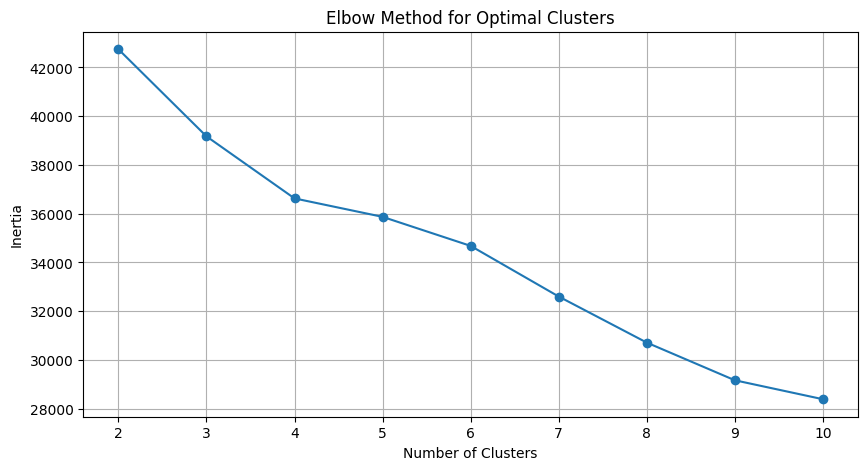

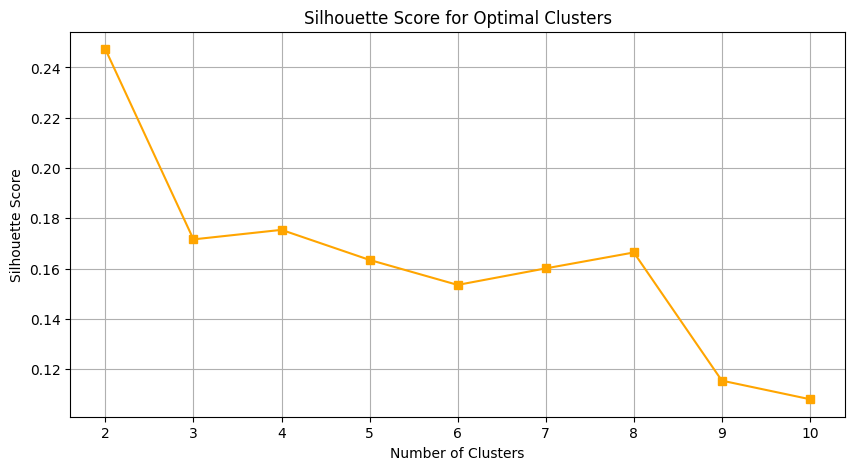

In [172]:
# Find the optimal number of clusters using the elbow and silhouette methods
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_processed)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_processed, kmeans.labels_))

# Plot the elbow curve (Inertia)
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_clusters, silhouette_scores, marker='s', color='orange', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.grid(True)
plt.show()


In [173]:
# Choose optimal clusters and fit KMeans
optimal_k = 4  # Update this based on the elbow/silhouette plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_processed)

# Add cluster labels to the original dataset
data['KMeans_Cluster'] = kmeans_labels

DBSCAN Clustering

In [174]:
# Fit DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # Adjust eps and min_samples based on your dataset
dbscan_labels = dbscan.fit_predict(data_processed)

# Add DBSCAN labels to the original dataset
data['DBSCAN_Cluster'] = dbscan_labels


Visualize the clusters

In [175]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_processed)

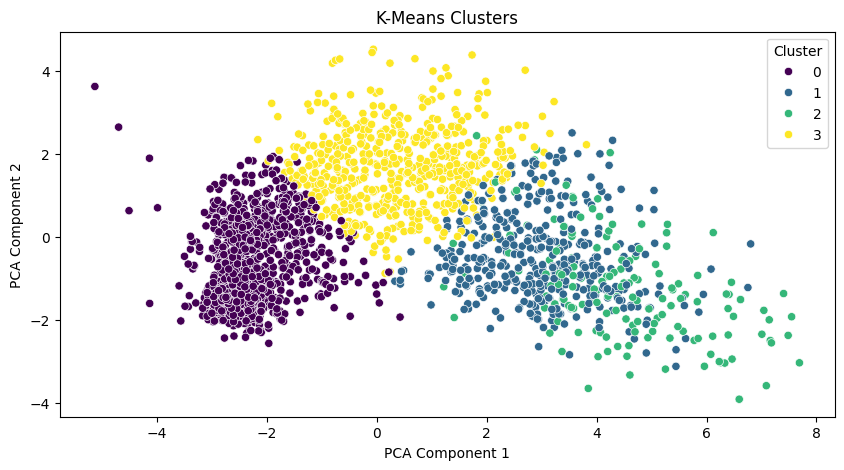

In [176]:
# Visualize KMeans clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

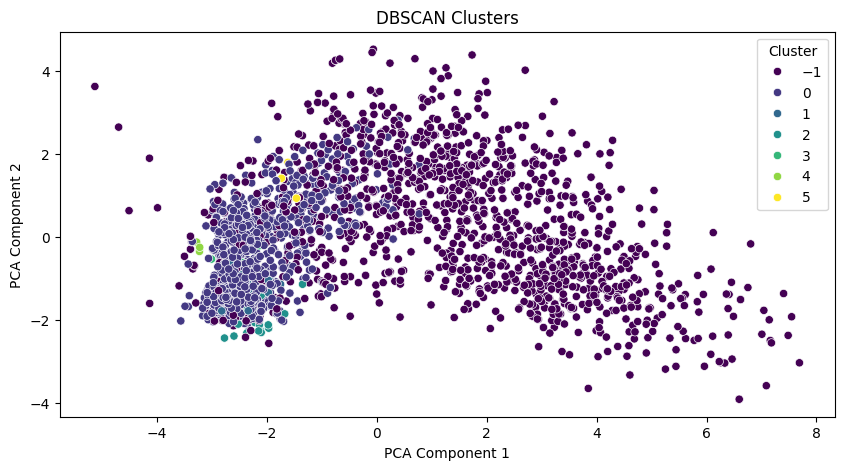

In [177]:
# Visualize DBSCAN clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

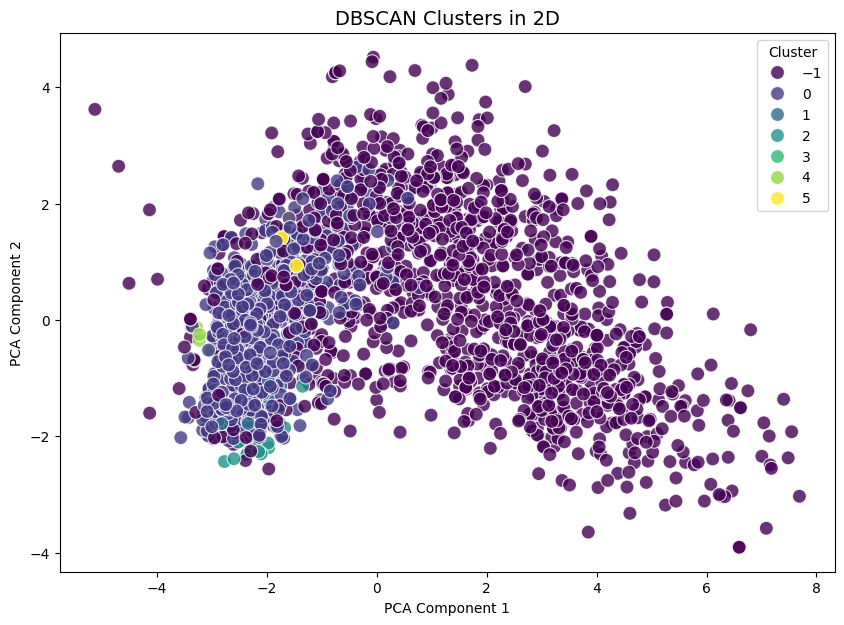

In [178]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 2D Visualization of DBSCAN clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    hue=data['DBSCAN_Cluster'],
    palette='viridis',
    alpha=0.8,
    s=100
)
plt.title('DBSCAN Clusters in 2D', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



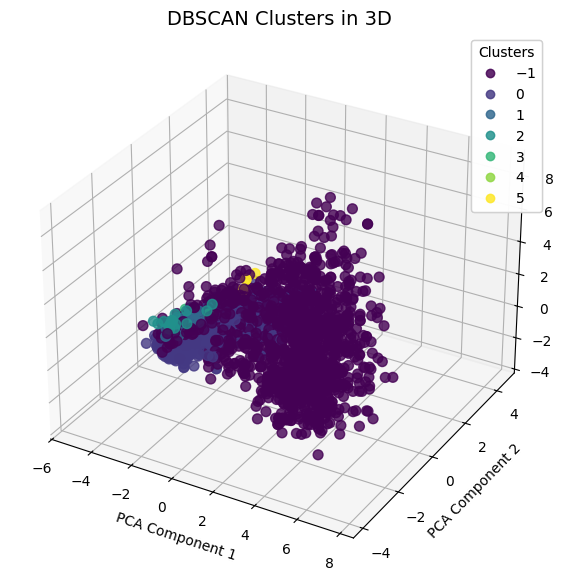

In [179]:
from sklearn.decomposition import PCA

# Perform PCA with 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_processed)

# Now plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    data_pca[:, 0], data_pca[:, 1], data_pca[:, 2],
    c=data['DBSCAN_Cluster'], cmap='viridis', s=50, alpha=0.8
)

ax.set_title('DBSCAN Clusters in 3D', fontsize=14)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="upper right")
ax.add_artist(legend1)

plt.show()


Evaluate and Interpret

Cluster Summary: Group data by clusters and compute mean/median values for key variables

In [180]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Group by KMeans_Cluster and compute the mean
print("KMeans Cluster Means:")
print(numeric_columns.groupby(data['KMeans_Cluster']).mean())

# Group by DBSCAN_Cluster and compute the mean
print("\nDBSCAN Cluster Means:")
print(numeric_columns.groupby(data['DBSCAN_Cluster']).mean())



KMeans Cluster Means:
                 Year_Birth        Income   Kidhome  Teenhome    Recency  \
KMeans_Cluster                                                             
0               1971.733005  34635.445320  0.802956  0.436453  49.109360   
1               1967.909091  74300.650000  0.047727  0.218182  49.159091   
2               1969.396450  81926.739645  0.053254  0.130178  49.568047   
3               1964.339527  57579.437500  0.226351  0.944257  48.579392   

                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
KMeans_Cluster                                                            
0                40.403941   4.969458        23.015764         7.303448   
1               490.547727  72.395455       431.572727       106.593182   
2               876.810651  55.532544       469.053254        76.639053   
3               457.856419  20.476351       130.979730        27.261824   

                MntSweetProducts  ...  NumWebVisitsMonth  AcceptedCmp3

In [181]:
print("Cluster Counts:")
print(data.groupby('KMeans_Cluster').size())

Cluster Counts:
KMeans_Cluster
0    1015
1     440
2     169
3     592
dtype: int64


# Fine-Tuning K-Means

Optimal Number of Clusters

Use the Elbow Method and Silhouette Scores:
Ensure the elbow curve has a noticeable bend and silhouette scores peak.

Interpret the plots:

If the silhouette score decreases after a certain number of clusters, it indicates over-segmentation.
Refine the number of clusters based on business needs or intuition

Select the highest silhouette score and adjust k accordingly in the KMeans initialization

In [182]:
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_processed)
    silhouette_avg = silhouette_score(data_processed, kmeans_labels)
    print(f"Number of Clusters: {k}, Silhouette Score: {silhouette_avg}")


Number of Clusters: 2, Silhouette Score: 0.24723742485728942
Number of Clusters: 3, Silhouette Score: 0.1716123651223095
Number of Clusters: 4, Silhouette Score: 0.1754048403309895
Number of Clusters: 5, Silhouette Score: 0.16344243184372384
Number of Clusters: 6, Silhouette Score: 0.15350306582623752
Number of Clusters: 7, Silhouette Score: 0.160078386412964
Number of Clusters: 8, Silhouette Score: 0.16640821453894114
Number of Clusters: 9, Silhouette Score: 0.11543789478885051
Number of Clusters: 10, Silhouette Score: 0.10804714311572684


# Fine-Tuning DBSCAN
Key Parameters to Tune:

eps (Epsilon): Maximum distance between points to be considered neighbors.

Start with small values like 0.5 and incrementally increase.
Larger values make clusters more inclusive.

min_samples: Minimum number of points to form a cluster.
Increasing this reduces the likelihood of small clusters (noise).

Choose the combination with the highest silhouette score or best logical separation of clusters.

In [183]:
from sklearn.metrics import silhouette_score

eps_values = [0.5, 1, 1.5, 2]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_processed)
        if len(set(labels)) > 1:  # Ensure more than 1 cluster
            silhouette_avg = silhouette_score(data_processed, labels)
            print(f"DBSCAN -> eps: {eps}, min_samples: {min_samples}, Silhouette Score: {silhouette_avg}")


DBSCAN -> eps: 0.5, min_samples: 3, Silhouette Score: -0.3386925174668809
DBSCAN -> eps: 1, min_samples: 3, Silhouette Score: -0.321211088797256
DBSCAN -> eps: 1, min_samples: 5, Silhouette Score: -0.20072778590185741
DBSCAN -> eps: 1, min_samples: 10, Silhouette Score: -0.1867996092249669
DBSCAN -> eps: 1.5, min_samples: 3, Silhouette Score: -0.27630664894959445
DBSCAN -> eps: 1.5, min_samples: 5, Silhouette Score: -0.23182938008204412
DBSCAN -> eps: 1.5, min_samples: 10, Silhouette Score: -0.19060568600332808
DBSCAN -> eps: 2, min_samples: 3, Silhouette Score: -0.21498711050522215
DBSCAN -> eps: 2, min_samples: 5, Silhouette Score: -0.03881296628457312
DBSCAN -> eps: 2, min_samples: 10, Silhouette Score: 0.09354549006645442


# Cluster Profiling

## Interpretation of Clusters

Group data by cluster labels:

In [184]:
# Select only numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Compute KMeans cluster summary
kmeans_summary = data[numeric_columns].groupby(data['KMeans_Cluster']).mean()

# Compute DBSCAN cluster summary (excluding noise points)
dbscan_summary = data[numeric_columns][data['DBSCAN_Cluster'] != -1].groupby(data['DBSCAN_Cluster']).mean()

# Print summaries
print("KMeans Cluster Summary:")
print(kmeans_summary)

print("\nDBSCAN Cluster Summary (Excluding Noise):")
print(dbscan_summary)



KMeans Cluster Summary:
                 Year_Birth        Income   Kidhome  Teenhome    Recency  \
KMeans_Cluster                                                             
0               1971.733005  34635.445320  0.802956  0.436453  49.109360   
1               1967.909091  74300.650000  0.047727  0.218182  49.159091   
2               1969.396450  81926.739645  0.053254  0.130178  49.568047   
3               1964.339527  57579.437500  0.226351  0.944257  48.579392   

                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
KMeans_Cluster                                                            
0                40.403941   4.969458        23.015764         7.303448   
1               490.547727  72.395455       431.572727       106.593182   
2               876.810651  55.532544       469.053254        76.639053   
3               457.856419  20.476351       130.979730        27.261824   

                MntSweetProducts  ...  NumWebVisitsMonth  AcceptedCm

Key Insights:

Identify which clusters have high spending on specific products.
Look for demographic patterns (e.g., age, income) within clusters.
Examine campaign responses to understand promotional effectiveness.

Example Insights:

Cluster A: High-income families spending heavily on wine and gold.

Cluster B: Budget-conscious customers primarily engaging with discounted purchases.

Cluster C: Loyal customers with frequent purchases across multiple channels

## Visual Inspection

To validate results visually, ensure:

Distinct cluster separations in PCA/t-SNE plots.

Noise points (DBSCAN label -1) are outliers that make sense in the data context.

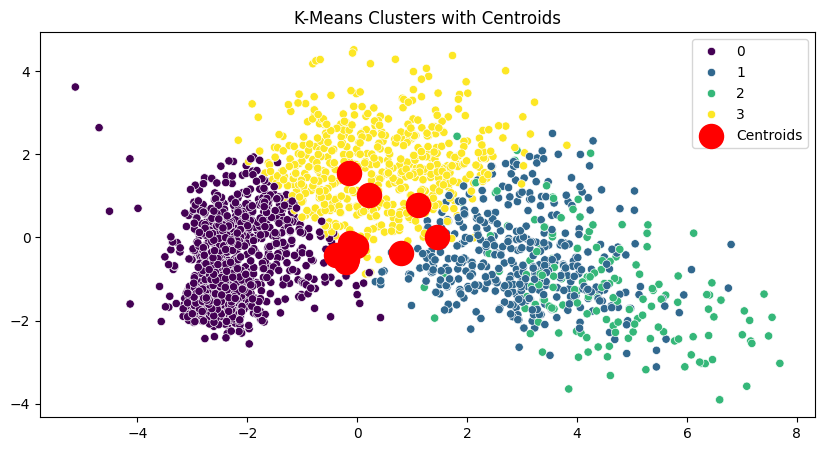

In [185]:
# Highlight cluster centers for KMeans
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['KMeans_Cluster'], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clusters with Centroids')
plt.legend()
plt.show()


Practical Applications

Targeted Marketing:
Design campaigns tailored for each segment (e.g., high-value vs. deal-seekers).

Resource Allocation:
Focus resources on clusters with higher ROI potential.

Product Development:
Develop new products or bundles based on preferences of specific clusters.